In [1]:
import os
import matplotlib.pyplot as plt
from color_grabber_v0_1 import grab_colors
import cv2
from tqdm import tqdm
import numpy as np

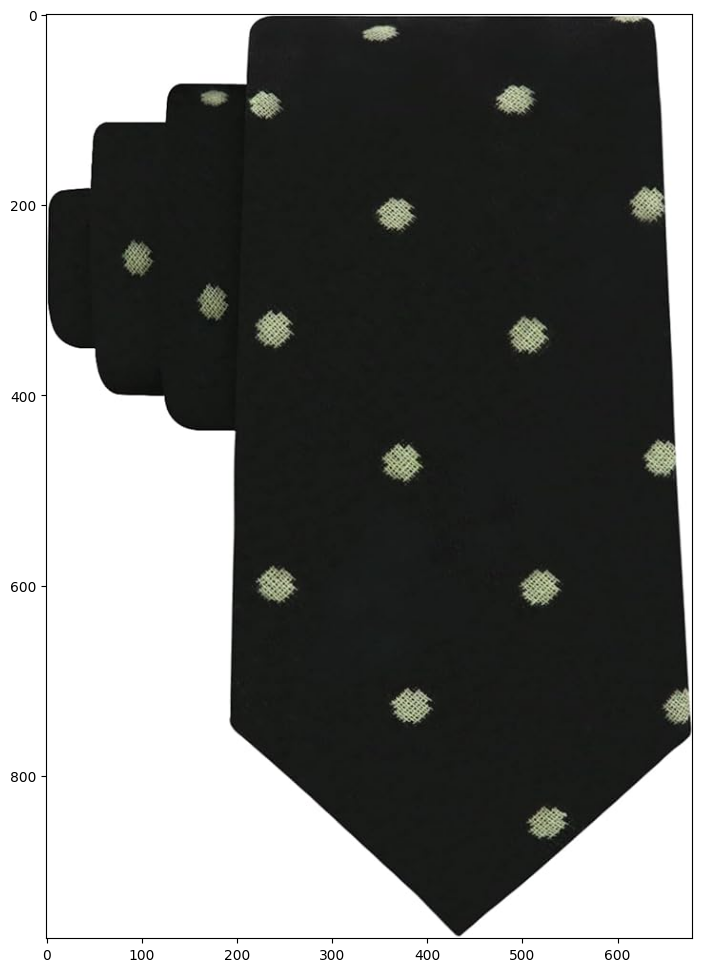

In [37]:
# path = '/Users/sdale/repos/find_my_tie/dataset_v0/61DzYRG4dNL._AC_SX679_.jpg' # k=4 inertia~0.5
# path = '/Users/sdale/repos/find_my_tie/dataset_v0/41KsDorToHL._AC_SX679_.jpg'
path = '/Users/sdale/repos/find_my_tie/dataset_v0/51cAhX5NCIL._AC_SX679_.jpg'
# path = '/Users/sdale/repos/find_my_tie/dataset_v0/61nDGhoS+gL._AC_SX679_.jpg'
img = cv2.imread(path)
plt.figure(figsize=(12, 12))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

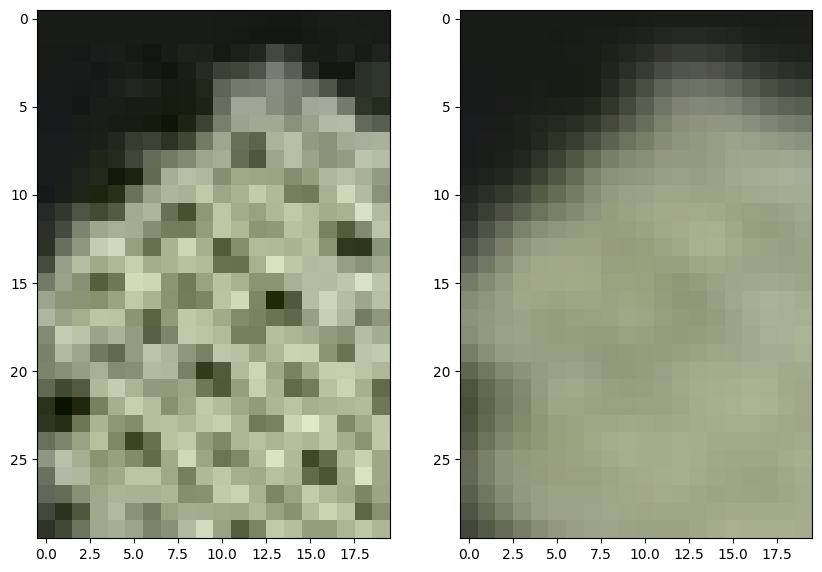

In [38]:
blur_img = cv2.GaussianBlur(img, (5, 5), 3)
rows = 190, 220
cols = 350, 370
fig = plt.figure(figsize=(10, 20))
fig.add_subplot(1, 2, 1) 
plt.imshow(cv2.cvtColor(img[rows[0]:rows[1], cols[0]:cols[1]], cv2.COLOR_BGR2RGB))
fig.add_subplot(1, 2, 2) 
plt.imshow(cv2.cvtColor(blur_img[rows[0]:rows[1], cols[0]:cols[1]], cv2.COLOR_BGR2RGB))

In [39]:
k_list = []
inertia_list = []
for k in tqdm(range(1, 11)):
    centroids, cluster_weights, closest_points, inertia = grab_colors(
        blur_img, n_colors=k, weights=(5, 100, 100, 1, 1), 
        resize=False, blur=True, remove_background=True)
    k_list.append(k)
    inertia_list.append(inertia)

100%|██████████| 10/10 [00:04<00:00,  2.20it/s]


In [40]:
i_start = inertia_list[0]
red_list = []
for i in range(1, len(inertia_list)):
    i0 = inertia_list[i-1]
    i1 = inertia_list[i]
    red_list.append((i0-i1)/i_start)

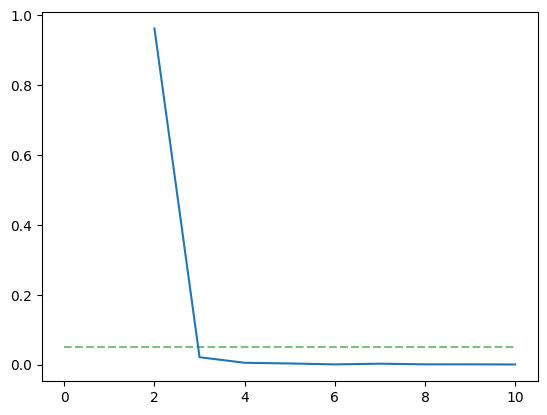

In [34]:
th = 0.05
plt.hlines([th], 0, max(k_list), linestyles='--', color='green', alpha=0.5)
plt.plot(k_list[1:], red_list)
# plt.plot(k_list, inertia_list)
# plt.ylim(0, max(inertia_list))

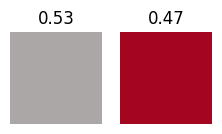

In [36]:
K = 2
centroids, cluster_weights, closest_points, inertia = grab_colors(
    img, n_colors=K, weights=(5, 100, 100, 1, 1), 
    resize=False, blur=True, remove_background=True)

sorted_inx = np.argsort(cluster_weights)[::-1]
centroids = centroids[sorted_inx]
cluster_weights = cluster_weights[sorted_inx]
closest_points = closest_points[sorted_inx]

fig = plt.figure(figsize=(14, 7)) 

for i in range(K):
    fig.add_subplot(2, k, i+1) 
    plt.title(f'{cluster_weights[i]:.2f}')
    lab = [int(x) for x in centroids[i][:3]]
    square = np.full((5, 5, 3), lab, dtype=np.uint8)
    plt.imshow(cv2.cvtColor(square, cv2.COLOR_LAB2RGB))
    plt.axis('off')

(-0.5, 49.5, 49.5, -0.5)

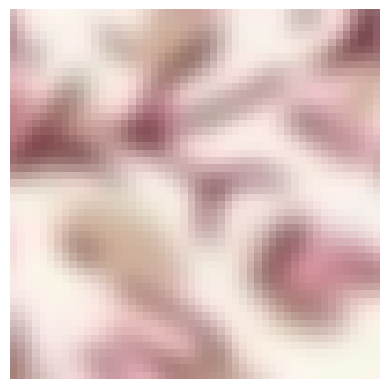

In [7]:
blur_img = cv2.GaussianBlur(img, (5, 5), 3)
plt.imshow(cv2.cvtColor(blur_img[300:350, 200:250, :], cv2.COLOR_BGR2RGB))
plt.axis('off')